In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('clean_data.csv')

In [3]:
df.head()

,location,price,total_sqft,No. of Bedrooms,School,24X7Security,CarParking,Hospital,LiftAvailable
0,Nizampet,6968000,1340,2,0,1,1,0,1
1,Hitech City,29000000,3498,4,0,1,1,0,1
2,Manikonda,6590000,1318,2,0,0,0,0,0
3,Alwal,5739000,1295,3,0,0,0,0,1
4,Kukatpally,5679000,1145,2,0,0,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   location         2518 non-null   object
 1   price            2518 non-null   int64 
 2   total_sqft       2518 non-null   int64 
 3   No. of Bedrooms  2518 non-null   int64 
 4   School           2518 non-null   int64 
 5   24X7Security     2518 non-null   int64 
 6   CarParking       2518 non-null   int64 
 7   Hospital         2518 non-null   int64 
 8   LiftAvailable    2518 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 177.2+ KB


In [5]:
df.describe()

,price,total_sqft,No. of Bedrooms,School,24X7Security,CarParking,Hospital,LiftAvailable
count,2.518000e+03,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,9.818380e+06,1644.571088,2.623511,0.340747,0.706513,0.736299,0.339952,0.975774
std,8.777113e+06,746.256956,0.687330,1.620984,1.615641,1.611552,1.620905,1.557725
min,2.000000e+06,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.760000e+06,1160.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.754000e+06,1500.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.090000e+07,1829.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.650000e+08,9400.000000,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [6]:
df.columns

Index(['location', 'price', 'total_sqft', 'No. of Bedrooms', 'School',
       '24X7Security', 'CarParking', 'Hospital', 'LiftAvailable'],
      dtype='object')

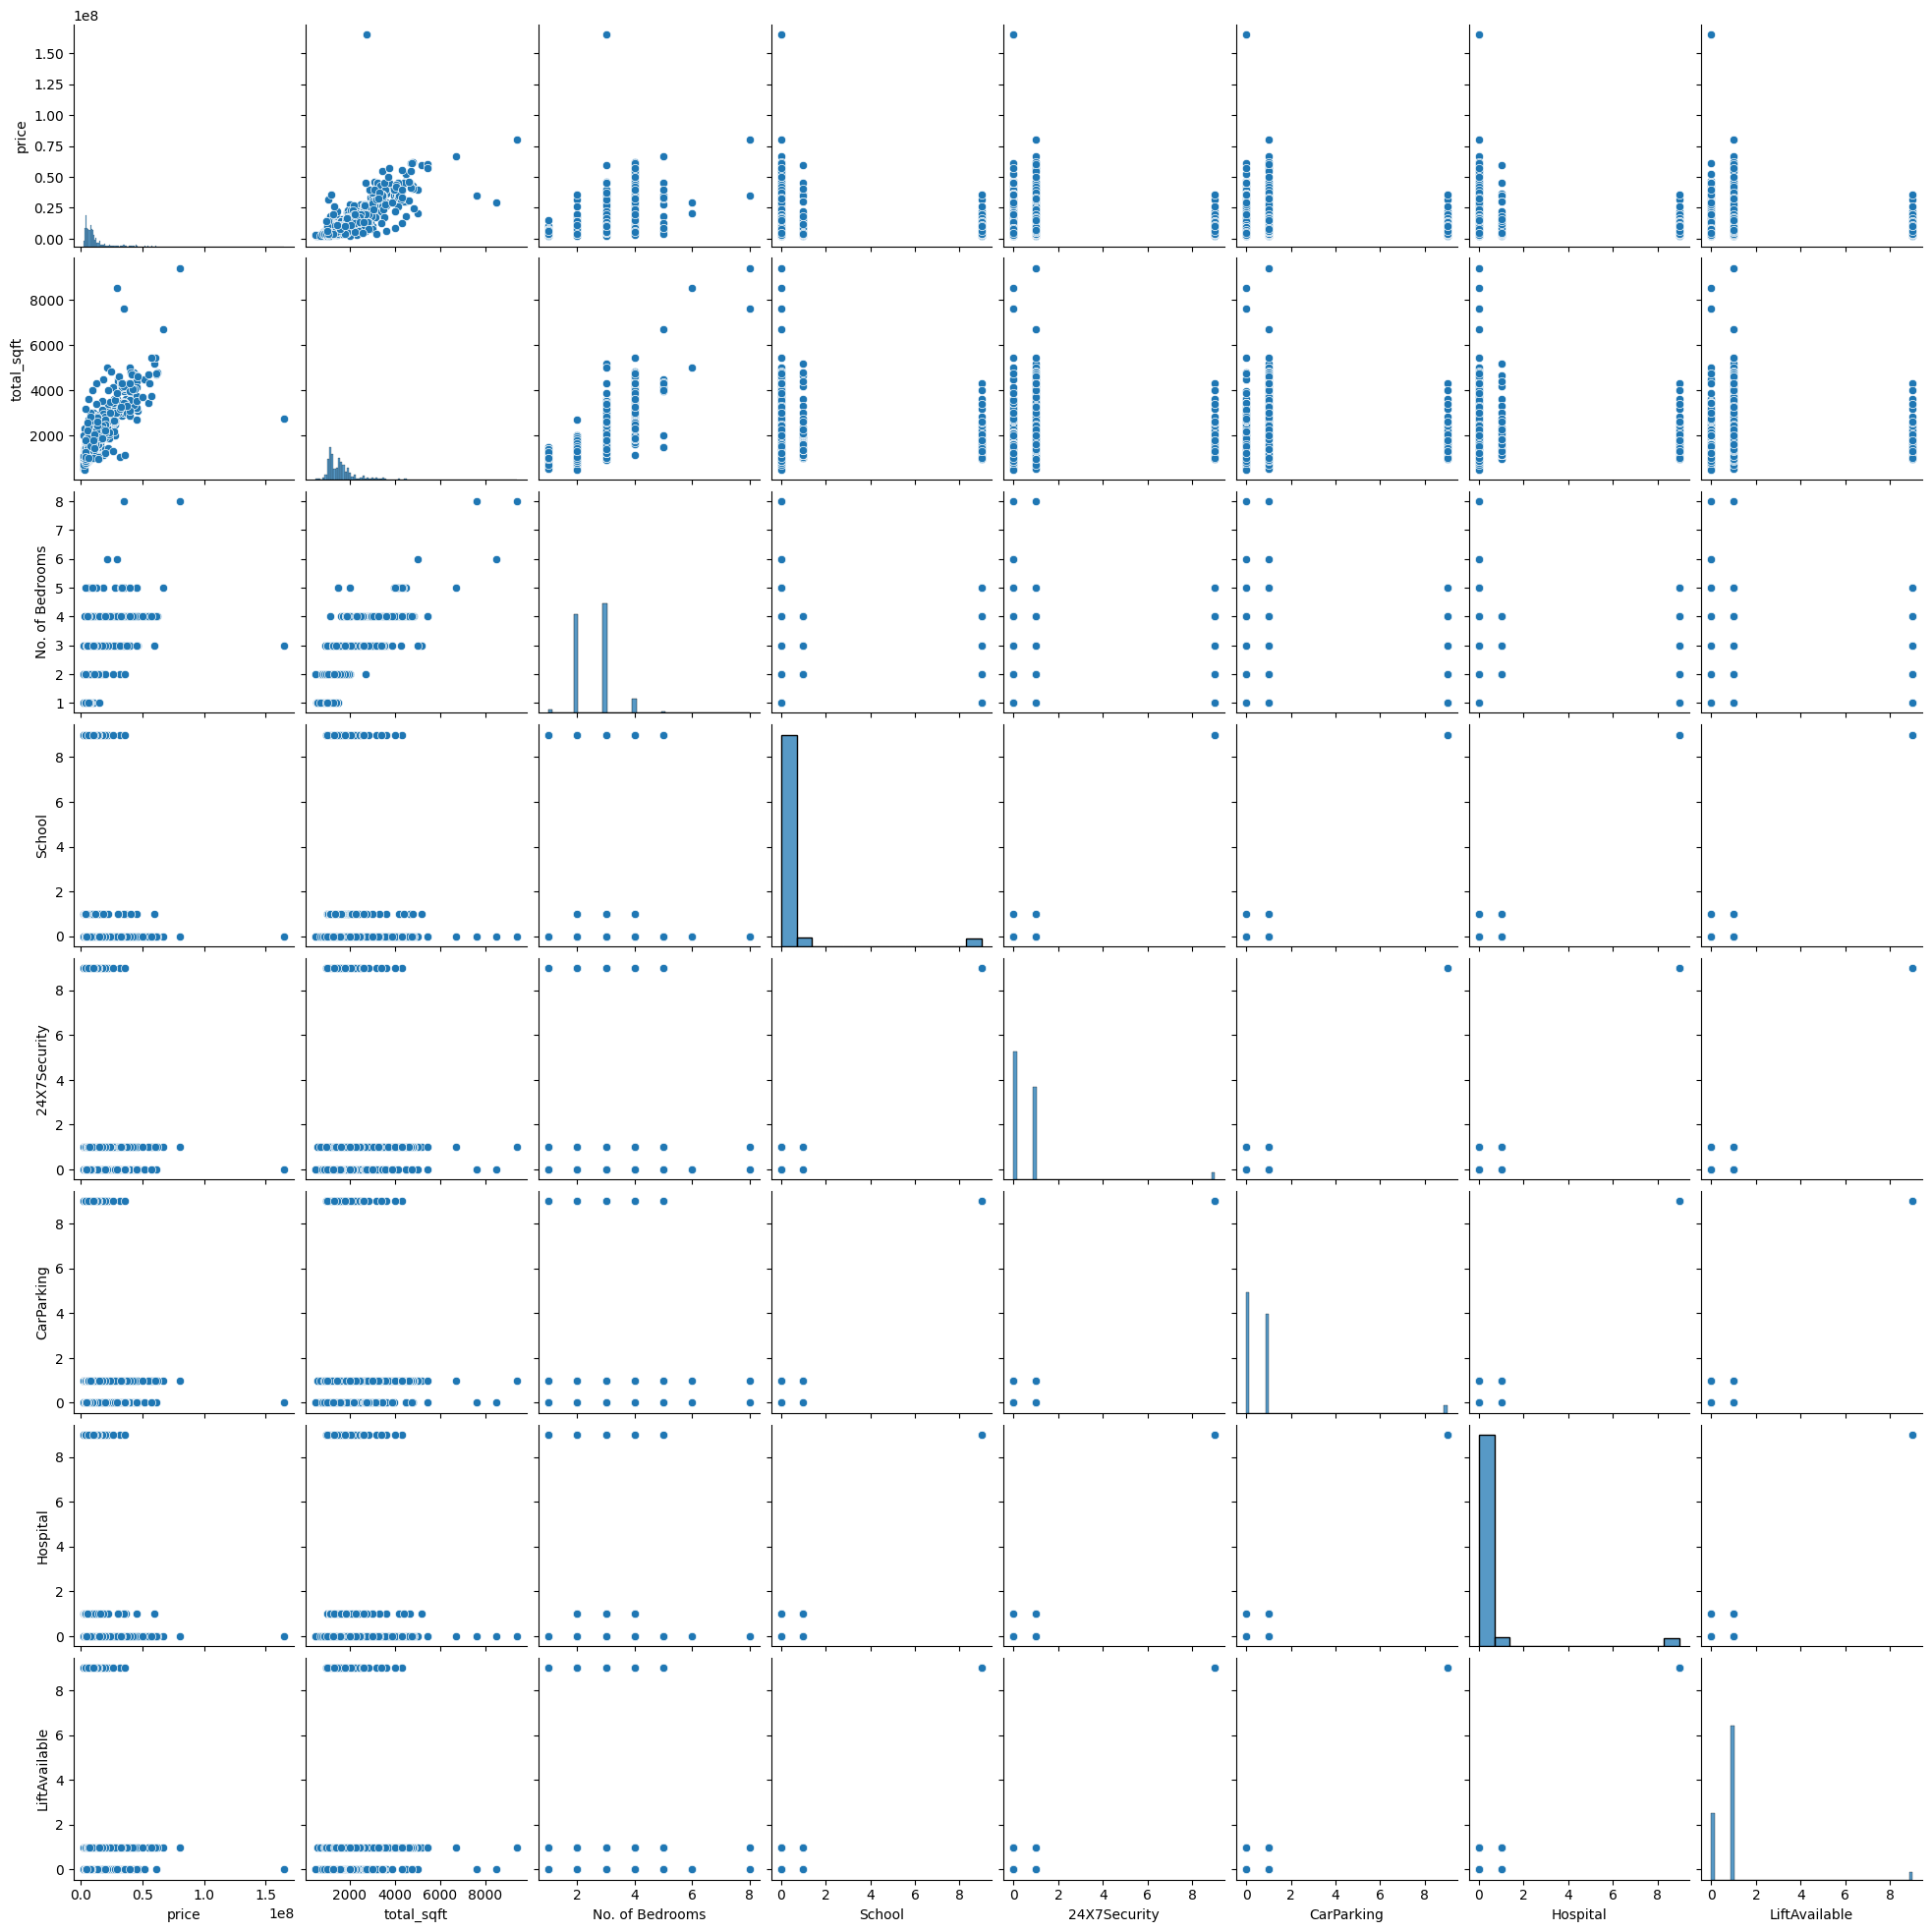

In [7]:
sns.pairplot(df)

In [10]:
Data=df.copy()

In [11]:
Data.head()

,location,price,total_sqft,No. of Bedrooms,School,24X7Security,CarParking,Hospital,LiftAvailable
0,Nizampet,6968000,1340,2,0,1,1,0,1
1,Hitech City,29000000,3498,4,0,1,1,0,1
2,Manikonda,6590000,1318,2,0,0,0,0,0
3,Alwal,5739000,1295,3,0,0,0,0,1
4,Kukatpally,5679000,1145,2,0,0,1,0,1


In [12]:
Data["location"].value_counts()

location
Kukatpally                       166
Kondapur                         149
Manikonda                        115
Nizampet                         106
Gachibowli                        83
                                ... 
Basheer Bagh                       1
Miyapur HMT Swarnapuri Colony      1
Adda Gutta                         1
Mayuri Nagar                       1
Paradise Circle                    1
Name: count, Length: 243, dtype: int64

In [17]:
Data["location"]=Data["location"].apply(lambda x: x.strip())
location_counts=Data["location"].value_counts()

In [18]:
location_counts

location
Kukatpally                       166
Kondapur                         149
Manikonda                        115
Nizampet                         106
Gachibowli                        83
                                ... 
Basheer Bagh                       1
Miyapur HMT Swarnapuri Colony      1
Adda Gutta                         1
Mayuri Nagar                       1
Paradise Circle                    1
Name: count, Length: 243, dtype: int64

In [19]:
location_10_counts=location_counts[location_counts<=10]
location_10_counts

location
Gandipet                         10
Mehdipatnam                      10
Somajiguda                        9
ECIL                              9
Uppal                             9
                                 ..
Basheer Bagh                      1
Miyapur HMT Swarnapuri Colony     1
Adda Gutta                        1
Mayuri Nagar                      1
Paradise Circle                   1
Name: count, Length: 189, dtype: int64

In [20]:
Data["location"]=Data["location"].apply(lambda x: "other" if x in location_10_counts else x)

In [21]:
Data["location"].value_counts()

location
other                        468
Kukatpally                   166
Kondapur                     149
Manikonda                    115
Nizampet                     106
Gachibowli                    83
Hitech City                   82
Miyapur                       80
Kokapet                       79
Pragathi Nagar Kukatpally     57
Bachupally Road               55
Narsingi                      52
Puppalaguda                   51
Beeramguda                    51
Nanakramguda                  49
Gajularamaram                 48
Banjara Hills                 44
Appa Junction                 43
Tellapur                      43
Serilingampally               41
Jubilee Hills                 41
Krishna Reddy Pet             34
Madhapur                      34
Nallagandla Gachibowli        32
Appa Junction Peerancheru     28
Bachupally                    28
Malkajgiri                    22
Mallampet                     22
Begumpet                      21
Aminpur                       20
A

In [22]:
Data["price_per_sqft"]=(Data["price"]/Data["total_sqft"])*100000

In [23]:
Data["price_per_sqft"].describe()

count    2.518000e+03
mean     5.488335e+08
std      2.417874e+08
min      1.055000e+08
25%      4.000000e+08
50%      5.000000e+08
75%      6.477659e+08
max      6.000000e+09
Name: price_per_sqft, dtype: float64

In [24]:
def sqft_outlier_removal(df):
    op_df=pd.DataFrame()
    for location,subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        
        gen_df=subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<=(m+sd))]
        op_df=pd.concat([op_df,gen_df], ignore_index=True)
    return op_df
Data=sqft_outlier_removal(Data)
Data.describe() 

,price,total_sqft,No. of Bedrooms,School,24X7Security,CarParking,Hospital,LiftAvailable,price_per_sqft
count,1.963000e+03,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1.963000e+03
mean,9.251986e+06,1613.786551,2.612837,0.202241,0.576159,0.612837,0.197657,0.855833,5.329551e+08
std,6.915921e+06,661.379307,0.661970,1.232567,1.265750,1.263007,1.231449,1.217064,1.682728e+08
min,2.022000e+06,540.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+08
25%,4.800000e+06,1165.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.016548e+08
50%,7.533000e+06,1500.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.998750e+08
75%,1.070000e+07,1800.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.000000,6.376066e+08
max,6.640000e+07,6718.000000,6.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.210526e+09


In [25]:
Data

,location,price,total_sqft,No. of Bedrooms,School,24X7Security,CarParking,Hospital,LiftAvailable,price_per_sqft
0,Adibatla,2800000,1400,3,0,0,0,0,0,2.000000e+08
1,Adibatla,2800000,1400,3,0,0,0,0,0,2.000000e+08
2,Adibatla,2022000,1010,2,0,0,0,0,0,2.001980e+08
3,Adibatla,2200000,1050,2,0,0,0,0,0,2.095238e+08
4,Adibatla,2800000,1200,2,0,0,0,0,0,2.333333e+08
...,...,...,...,...,...,...,...,...,...,...
1958,other,7584999,1250,2,9,9,9,9,9,6.067999e+08
1959,other,5250000,1485,3,9,9,9,9,9,3.535354e+08
1960,other,9800000,1650,2,9,9,9,9,9,5.939394e+08
1961,other,7500000,1550,2,9,9,9,9,9,4.838710e+08


In [36]:
Data.drop("price_per_sqft",axis=1,inplace=True)

In [39]:
Data.to_csv("Clean2_data.csv",index=False)

In [40]:
x=Data.drop("price",axis=1)

In [41]:
y=Data["price"]

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=16)

In [44]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1766, 8), (1766,), (197, 8), (197,))

In [46]:
column_transformer=make_column_transformer((OneHotEncoder(sparse=False),['location']), remainder='passthrough')

In [49]:
scaler = StandardScaler()
linear_rg = LinearRegression()

In [50]:
pipe = make_pipeline(column_transformer,scaler,linear_rg)

In [55]:
import warnings
warnings.filterwarnings("ignore")
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [52]:
y_pred_lr = pipe.predict(x_test)

In [53]:
r2_score(y_test,y_pred_lr)

0.8828553993413164

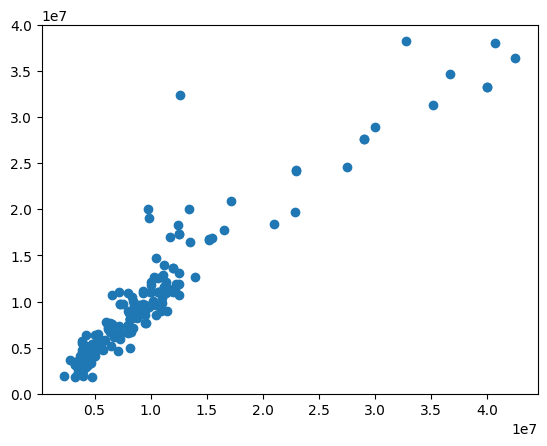

In [56]:
plt.scatter(y_test, y_pred_lr)

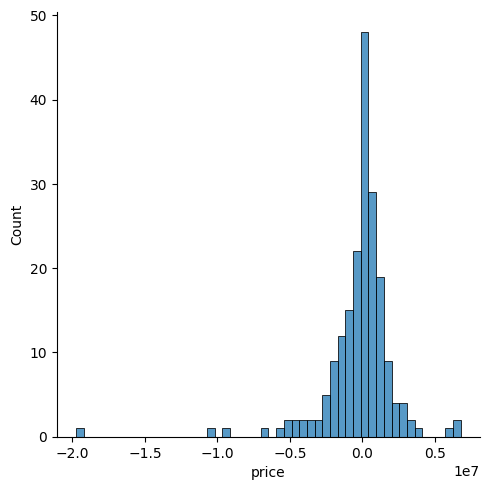

In [57]:
sns.displot((y_test-y_pred_lr),bins=50);